In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [2]:
df = pd.read_excel('data/Debourgh-Sales.xlsx', sheet_name='Sheet2')

In [3]:
df.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
Years    108 non-null datetime64[ns]
Sales    108 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


### LINE CHART

In [5]:
x = df['Years']
y = df['Sales']

In [7]:
import matplotlib.dates as mdates
x = mdates.date2num(x)

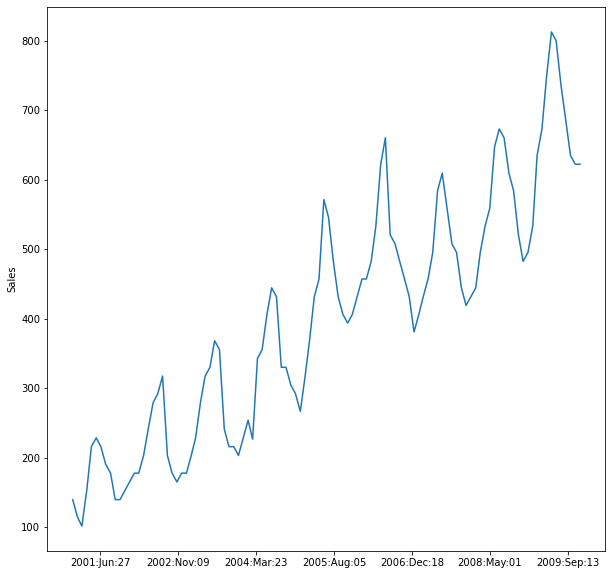

In [19]:
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x=x, y=y, data=df)
format_str = '%Y:%b:%d'
format_ = mdates.DateFormatter(format_str)
ax.xaxis.set_major_formatter(format_)

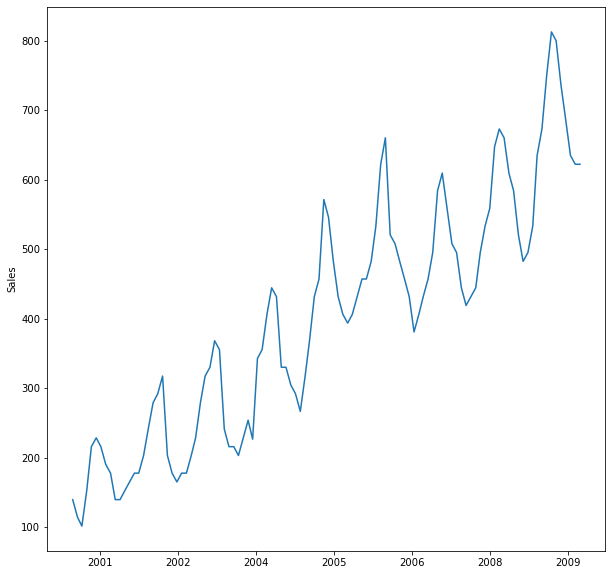

In [20]:
plt.figure(figsize=(10, 10))
ax = sns.lineplot(x=x, y=y, data=df)
format_str = '%Y'
format_ = mdates.DateFormatter(format_str)
ax.xaxis.set_major_formatter(format_)

In [21]:
df1 = df.set_index('Years')
df1.head()

,Sales
Years,
2001-01-01,139.7
2001-02-01,114.3
2001-03-01,101.6
2001-04-01,152.4
2001-05-01,215.9


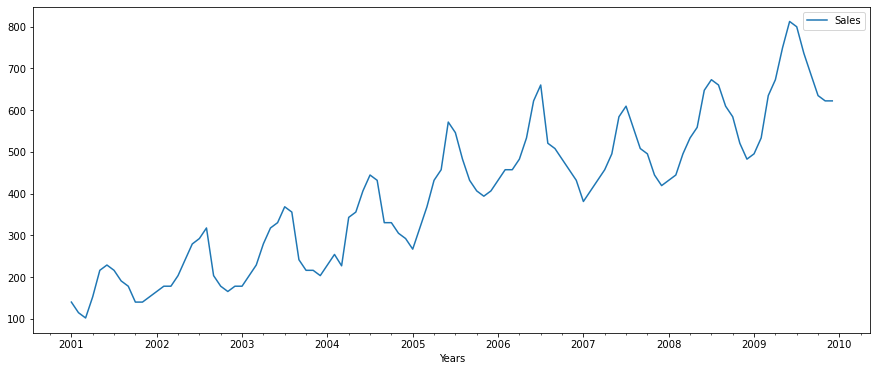

In [24]:
fig,ax = plt.subplots(figsize=(15, 6))
df1.plot(kind='line', ax=ax)
plt.show()

## HUE THE LINE CHART

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
Years    108 non-null datetime64[ns]
Sales    108 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.8 KB


In [29]:
df['year'] = df['Years'].dt.year
df['quater'] = df['Years'].dt.quarter

In [35]:
df.head()

,Years,Sales,year,quater
0,2001-01-01,139.7,2001,1
1,2001-02-01,114.3,2001,1
2,2001-03-01,101.6,2001,1
3,2001-04-01,152.4,2001,2
4,2001-05-01,215.9,2001,2


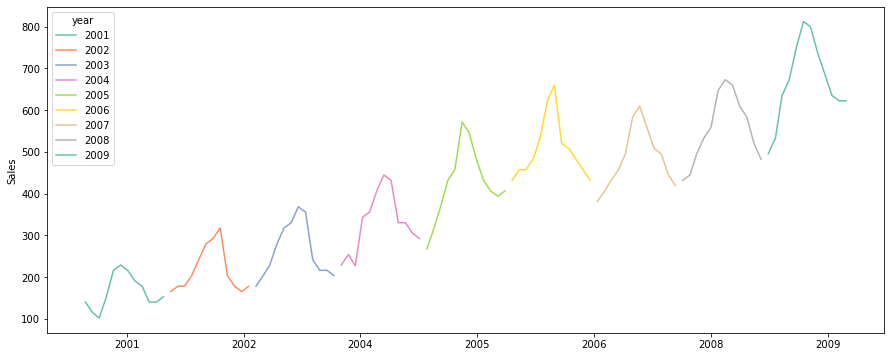

In [33]:
plt.figure(figsize=(15, 6))
ax = sns.lineplot(x=x, y=y, data=df, hue='year', palette='Set2')
format_str = '%Y'
format_ = mdates.DateFormatter(format_str)
ax.xaxis.set_major_formatter(format_)

# AREA CHARTS

In [34]:
df.head()

,Years,Sales,year,quater
0,2001-01-01,139.7,2001,1
1,2001-02-01,114.3,2001,1
2,2001-03-01,101.6,2001,1
3,2001-04-01,152.4,2001,2
4,2001-05-01,215.9,2001,2


<AxesSubplot:xlabel='Years'>

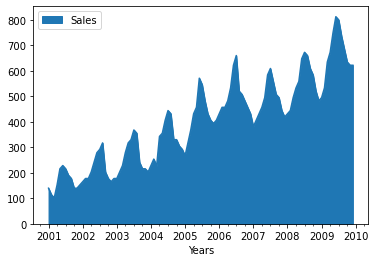

In [36]:
df1.plot(kind='area')

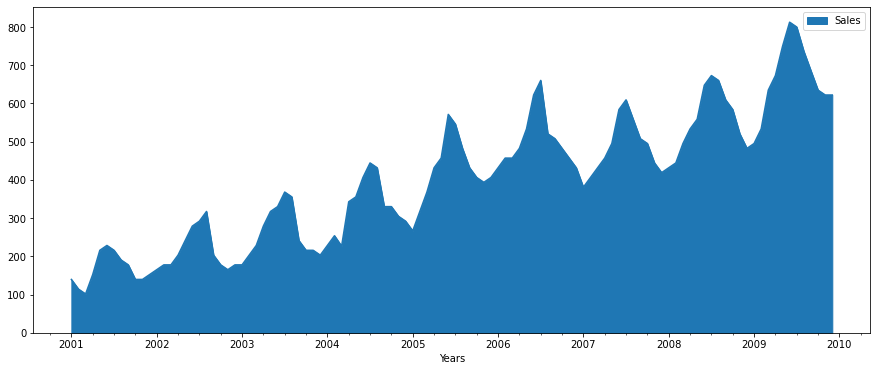

In [40]:
fig, ax = plt.subplots(figsize=(15, 6))
df1.plot(kind='area', ax=ax)
plt.show()


# BAR PLOT

Bar plot is used for only **Categorical data**

In [46]:
df_year = df[['Sales', 'year']].groupby(by='year').sum().reset_index()

In [48]:
df_year.head()

,year,Sales
0,2001,1968.5
1,2002,2577.8
2,2003,3136.9
3,2004,3947.8
4,2005,5080.0


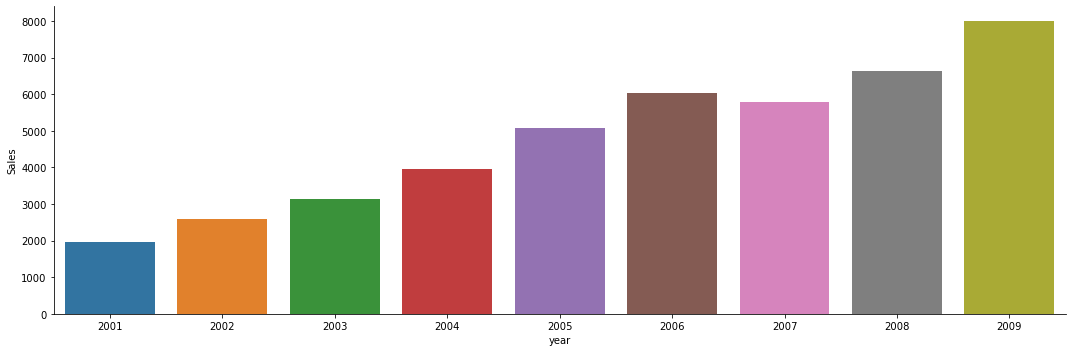

In [52]:
sns.catplot(x='year', y='Sales', data=df_year, kind='bar', aspect=3)

<AxesSubplot:xlabel='year', ylabel='Sales'>

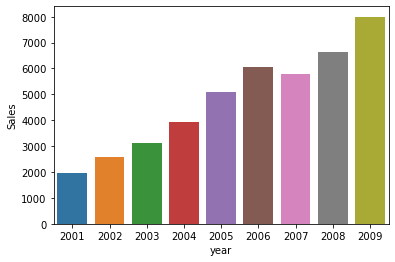

In [51]:
sns.barplot(x='year', y='Sales', data=df_year)

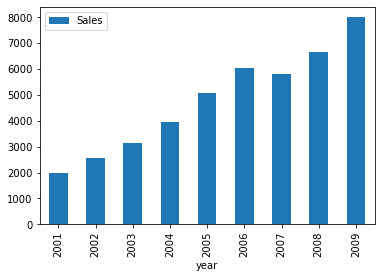

In [55]:
plt.Figure(figsize=(15, 6))
df_year.set_index('year').plot(kind='bar')
plt.show()

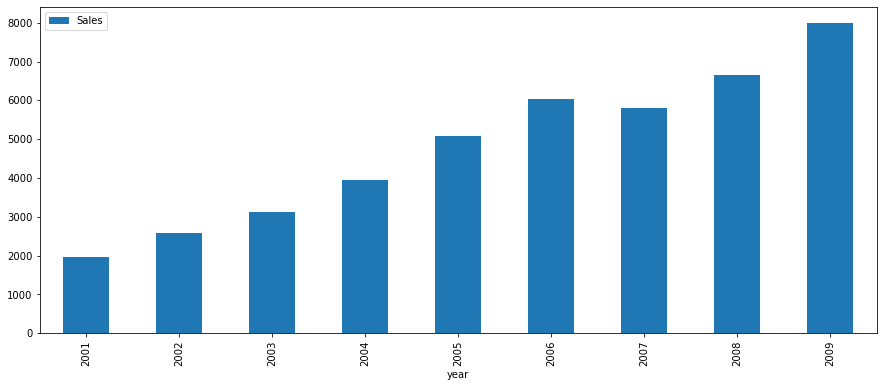

In [56]:
fig, ax = plt.subplots(figsize=(15, 6))
df_year.set_index('year').plot(kind='bar', ax=ax)
plt.show()

## PROPOSITION AND STACKED BAR, AREA CHART

### STACKED BAR PLOT

In [66]:
sales = df[['Sales', 'year', 'quater']].groupby(by=['year', 'quater']).sum()

In [67]:
sales

Sales
year quater        
2001 1        355.6
     2        596.9
     3        584.2
     4        431.8
2002 1        520.7
     2        723.6
     3        812.8
     4        520.7
2003 1        609.6
     2        927.1
     3        965.2
     4        635.0
2004 1        709.3
     2       1104.9
     3       1206.5
     4        927.1
2005 1        952.5
     2       1460.5
     3       1460.5
     4       1206.5
2006 1       1346.2
     2       1638.3
     3       1689.1
     4       1371.6
2007 1       1219.2
     2       1536.7
     3       1676.4
     4       1358.9
2008 1       1371.6
     2       1739.9
     3       1943.1
     4       1587.5
2009 1       1663.7
     2       2235.2
     3       2222.2
     4       1879.6

In [68]:
sales = sales.values

In [69]:
sales.shape

(36, 1)

there are 9 years of data and each year has 4 quaters

In [72]:
df_sales = pd.DataFrame(sales.reshape(9, 4), index=list(range(2001, 2010)), columns=['Q1','Q2','Q3','Q4'])

In [73]:
df_sales.head()

,Q1,Q2,Q3,Q4
2001,355.6,596.9,584.2,431.8
2002,520.7,723.6,812.8,520.7
2003,609.6,927.1,965.2,635.0
2004,709.3,1104.9,1206.5,927.1
2005,952.5,1460.5,1460.5,1206.5


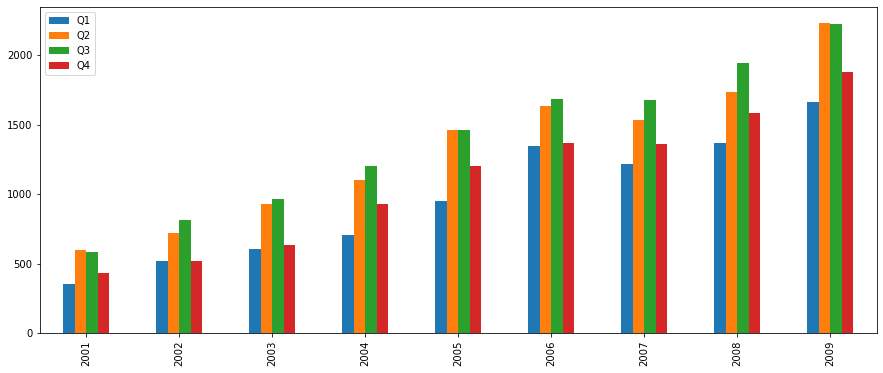

In [75]:
fig, ax = plt.subplots(figsize=(15, 6))
df_sales.plot(kind='bar',ax=ax)
plt.show()

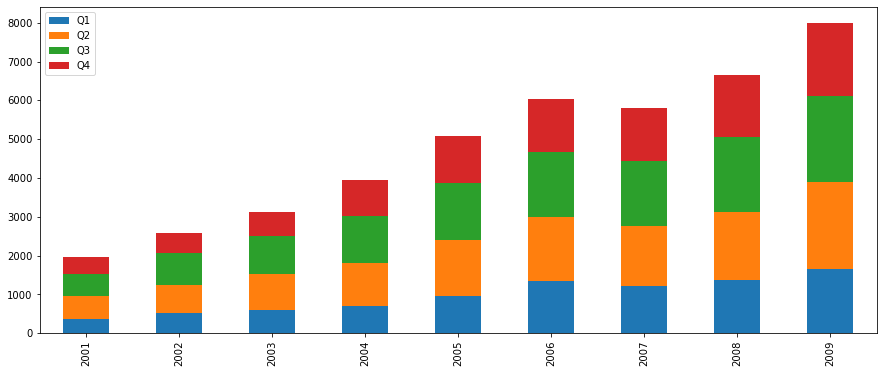

In [76]:
fig, ax = plt.subplots(figsize=(15, 6))
df_sales.plot(kind='bar',ax=ax, stacked=True)
plt.show()

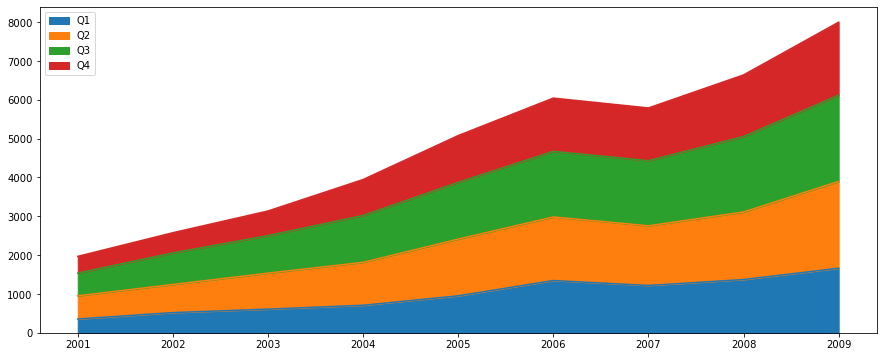

In [77]:
fig, ax = plt.subplots(figsize=(15, 6))
df_sales.plot(kind='area',ax=ax, stacked=True)
plt.show()

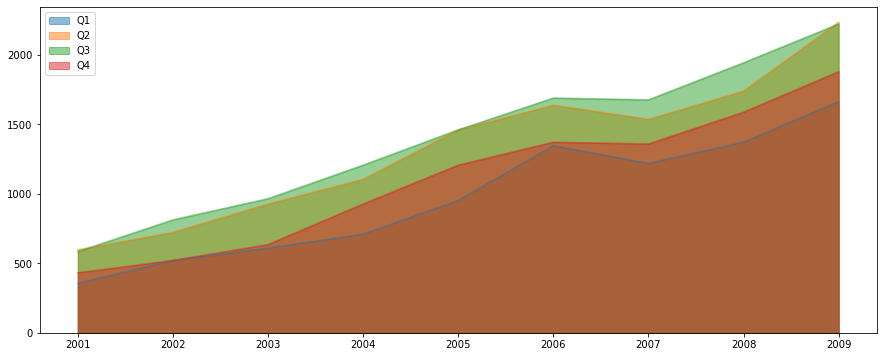

In [78]:
fig, ax = plt.subplots(figsize=(15, 6))
df_sales.plot(kind='area',ax=ax, stacked=False)
plt.show()

# HEATMAPS

In [79]:
df_sales

,Q1,Q2,Q3,Q4
2001,355.6,596.9,584.2,431.8
2002,520.7,723.6,812.8,520.7
2003,609.6,927.1,965.2,635.0
2004,709.3,1104.9,1206.5,927.1
2005,952.5,1460.5,1460.5,1206.5
2006,1346.2,1638.3,1689.1,1371.6
2007,1219.2,1536.7,1676.4,1358.9
2008,1371.6,1739.9,1943.1,1587.5
2009,1663.7,2235.2,2222.2,1879.6


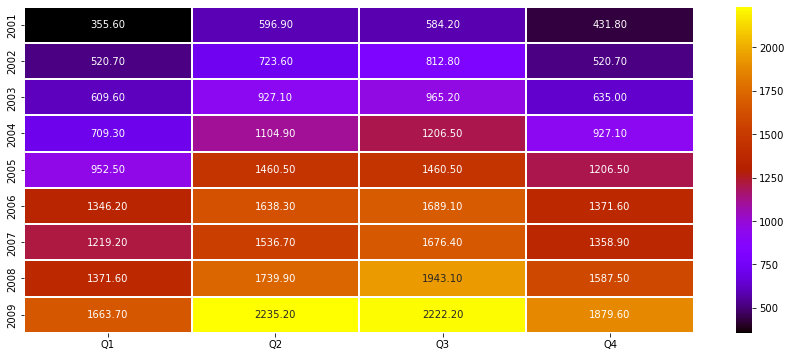

In [87]:
plt.figure(figsize=(15, 6))
sns.heatmap(df_sales, annot=True, fmt='.2f', cmap='gnuplot', linewidths=1)
plt.show()